<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_sem2_prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 5
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт необходимых библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Dense


## Часть 1: Автокодировщик
1.	Подготовка данных:
*	Загрузите датасет изображений (например, MNIST или Fashion MNIST).
*	Выполните нормализацию данных.
2.	Создание автокодировщика:
*	Постройте сеть с симметричной архитектурой:
*	Входной слой, сжимающий изображение до вектора.
*	Скрытые слои, выполняющие кодирование данных.
*	Декодирующие слои, восстанавливающие изображение из вектора.
3.	Обучение автокодировщика:
*	Обучите модель на обучающей выборке.
*	Оцените качество восстановления изображений на тестовой выборке.
4.	Визуализация:
*	Постройте графики исходных и восстановленных изображений.
*	Визуализируйте скрытые представления данных.
5.	Эксперимент:
*	Изучите влияние уменьшения размера скрытого представления (вектора) на качество восстановления.


In [3]:
# Подготовка данных (MNIST)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784)) # 28*28
x_test = x_test.reshape((len(x_test), 784))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Создание модели автокодировщика
encoding_dim = [8, 16, 32, 64]
autoencoders = []
results = []
for i in encoding_dim:
    input_img = Input(shape=(784,))
    encoded = Dense(i, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoders.append(autoencoder)


In [5]:
# Обучение модели
for i in range(len(autoencoders)):
    history = autoencoders[i].fit(x_train, x_train,
                                   epochs=20,
                                   batch_size=256,
                                   shuffle=True,
                                   validation_data=(x_test, x_test))
    results.append(history)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4550 - val_loss: 0.2603
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2472 - val_loss: 0.2101
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2057 - val_loss: 0.1907
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1902 - val_loss: 0.1826
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1831 - val_loss: 0.1788
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1797 - val_loss: 0.1765
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1775 - val_loss: 0.1746
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1759 - val_loss: 0.1732
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1743 - val_loss: 0.1720
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1735 - val_loss: 0.1710
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1723 - val_loss: 0.1700
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


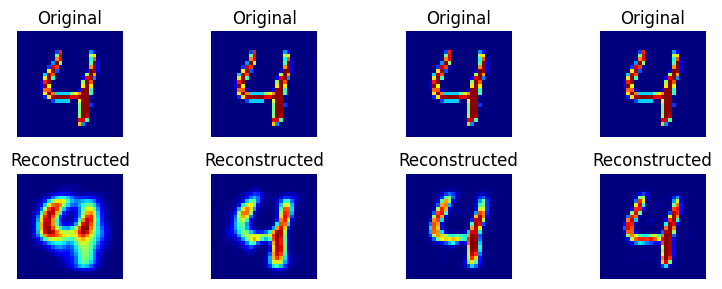

In [20]:
# Визуализация результатов
decoded_imgs = []
for j in range(len(autoencoders)):
    decoded_imgs.append(autoencoders[j].predict(x_test))
    n = 5  # Количество изображений для отображения
plt.figure(figsize=(10, 3))

for i in range(4):
    # Оригинальные изображения (тепловая карта)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[4].reshape(28, 28), cmap='jet')
    plt.title("Original")
    plt.axis('off')

    # Восстановленные изображения (тепловая карта)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i][4].reshape(28, 28), cmap='jet')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


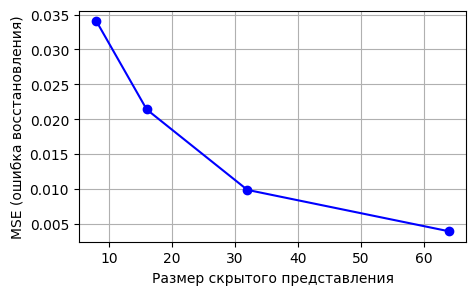

,Encoding dim,MSE,RMSE
0,8,0.034038,0.184493
1,16,0.021374,0.146200
2,32,0.009839,0.099191
3,64,0.003909,0.062519


In [21]:
# Оценка
mse_scores=[]
for j in range(len(autoencoders)):
    decoded_imgs = autoencoders[j].predict(x_test)
    mse = np.mean(np.power(x_test - decoded_imgs, 2))
    mse_scores.append(mse)

# График зависимости MSE от размера latent space
plt.figure(figsize=(5, 3))
plt.plot(encoding_dim, mse_scores, 'bo-')
plt.xlabel('Размер скрытого представления')
plt.ylabel('MSE (ошибка восстановления)')
plt.grid(True)
plt.show()

# Таблица результатов
results = pd.DataFrame({
    'Encoding dim': encoding_dim,
    'MSE': mse_scores,
    'RMSE': np.sqrt(mse_scores)
})
display(results)


## Часть 2: Рекуррентные нейронные сети.
1.	Подготовка данных:
*	Используйте набор последовательных данных, например, текстовый датасет (предсказание следующего слова) или временной ряд (предсказание следующего значения).
2.	Реализация рекуррентной сети:
*	Постройте базовую рекуррентную сеть с одним рекуррентным слоем (RNN).
*	Обучите её на предоставленных данных.
3.	Расширение модели:
*	Замените базовую RNN на LSTM и GRU.
*	Сравните их поведение и точность на тестовой выборке.
4.	Визуализация:
*	Графики ошибки и точности для каждой архитектуры (RNN, LSTM, GRU).
*	Визуализация предсказаний на временных рядах или текстах.


In [22]:
# Загрузка текста
text = open("input.txt").read().lower()

# Сформируем выборки
seq_length = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])


In [23]:
# Кодирование данных
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
X = np.zeros((len(sentences), seq_length, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


In [24]:
# Базовая RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(seq_length,
len(chars))))
model_rnn.add(Dense(len(chars), activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
history_rnn = model_rnn.fit(X, y, batch_size=128, epochs=10,
validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.1674 - loss: 3.1701 - val_accuracy: 0.2996 - val_loss: 2.5823
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.3092 - loss: 2.5268 - val_accuracy: 0.3266 - val_loss: 2.3691
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.3447 - loss: 2.3329 - val_accuracy: 0.3419 - val_loss: 2.3032
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.3613 - loss: 2.2370 - val_accuracy: 0.3465 - val_loss: 2.2650
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.3713 - loss: 2.1806 - val_accuracy: 0.3595 - val_loss: 2.2257
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.3813 - loss: 2.1308 - val_accuracy: 0.3687 - val_loss: 2.1929
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.3914 - loss: 2.0807 - val_accuracy: 0.3717 - val_loss: 2.1754
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.3972 - loss: 2.0530 - 

In [25]:
# Модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_length, len(chars))))
model_lstm.add(Dense(len(chars), activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X, y, batch_size=128, epochs=10,
validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.1484 - loss: 3.2310 - val_accuracy: 0.2691 - val_loss: 2.7575
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 76s 134ms/step - accuracy: 0.2714 - loss: 2.6978 - val_accuracy: 0.3091 - val_loss: 2.4972
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 83s 136ms/step - accuracy: 0.3004 - loss: 2.4884 - val_accuracy: 0.3249 - val_loss: 2.3895
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.3186 - loss: 2.3851 - val_accuracy: 0.3293 - val_loss: 2.3203
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 84s 139ms/step - accuracy: 0.3328 - loss: 2.3068 - val_accuracy: 0.3441 - val_loss: 2.2781
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 86s 151ms/step - accuracy: 0.3447 - loss: 2.2698 - val_accuracy: 0.3532 - val_loss: 2.2381
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.3606 - loss: 2.2100 - val_accuracy: 0.3563 - val_loss: 2.2133
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 49s 140ms/step - accuracy: 0.3660 - loss: 2

In [26]:
# Модель GRU
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(seq_length, len(chars))))
model_gru.add(Dense(len(chars), activation='softmax'))
model_gru.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
history_gru = model_gru.fit(X, y, batch_size=128, epochs=10,
validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 57s 156ms/step - accuracy: 0.1790 - loss: 3.1834 - val_accuracy: 0.2995 - val_loss: 2.4839
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.3050 - loss: 2.4602 - val_accuracy: 0.3308 - val_loss: 2.3230
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.3374 - loss: 2.3061 - val_accuracy: 0.3581 - val_loss: 2.2259
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.3674 - loss: 2.1891 - val_accuracy: 0.3723 - val_loss: 2.1582
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.3853 - loss: 2.0899 - val_accuracy: 0.3846 - val_loss: 2.0922
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.4099 - loss: 2.0119 - val_accuracy: 0.3993 - val_loss: 2.0524
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 79s 148ms/step - accuracy: 0.4279 - loss: 1.9443 - val_accuracy: 0.4074 - val_loss: 2.0127
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 84s 155ms/step - accuracy: 0.4370 - loss: 1

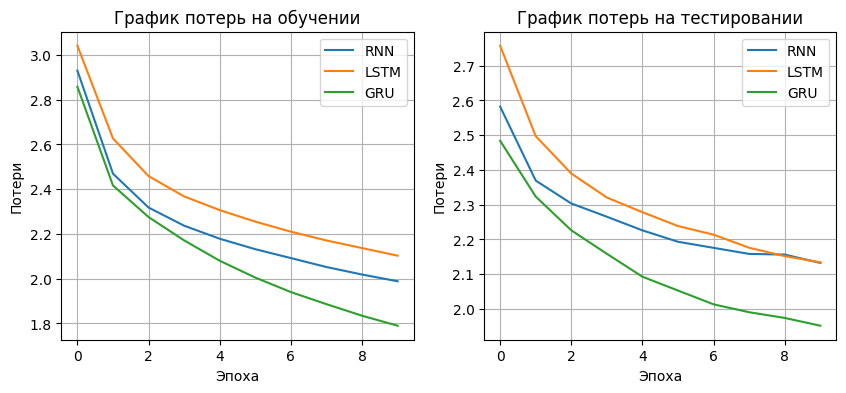

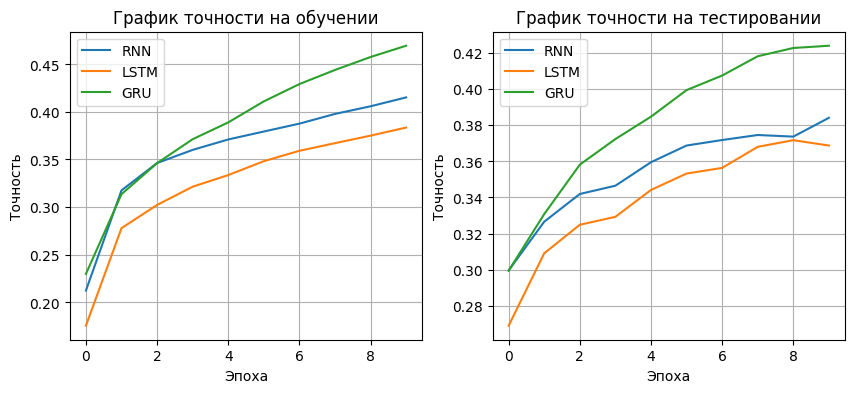

| Модель   |   Loss (Train) |   Loss (Val) |   Accuracy (Train) |   Accuracy (Val) |
|:---------|---------------:|-------------:|-------------------:|-----------------:|
| RNN      |        1.98755 |      2.13186 |           0.415134 |         0.384016 |
| LSTM     |        2.10201 |      2.13372 |           0.383482 |         0.368695 |
| GRU      |        1.78889 |      1.95113 |           0.469412 |         0.423887 |


In [27]:
# Визуализация результатов
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='RNN')
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_gru.history['loss'], label='GRU')
plt.title("График потерь на обучении")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_loss'], label='RNN')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.plot(history_gru.history['val_loss'], label='GRU')
plt.title("График потерь на тестировании")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.grid()

plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='RNN')
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.plot(history_gru.history['accuracy'], label='GRU')
plt.title("График точности на обучении")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_gru.history['val_accuracy'], label='GRU')
plt.title("График точности на тестировании")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()
plt.grid()

plt.show()


metrics = {
    'Модель': ['RNN', 'LSTM', 'GRU'],
    'Loss (Train)': [history_rnn.history['loss'][-1],
                    history_lstm.history['loss'][-1],
                    history_gru.history['loss'][-1]],
    'Loss (Val)': [history_rnn.history['val_loss'][-1],
                  history_lstm.history['val_loss'][-1],
                  history_gru.history['val_loss'][-1]],
    'Accuracy (Train)': [history_rnn.history['accuracy'][-1],
                        history_lstm.history['accuracy'][-1],
                        history_gru.history['accuracy'][-1]],
    'Accuracy (Val)': [history_rnn.history['val_accuracy'][-1],
                      history_lstm.history['val_accuracy'][-1],
                      history_gru.history['val_accuracy'][-1]]
}

df = pd.DataFrame(metrics)
print(df.to_markdown(index=False))


=== Температура генерации: 0.5 ===


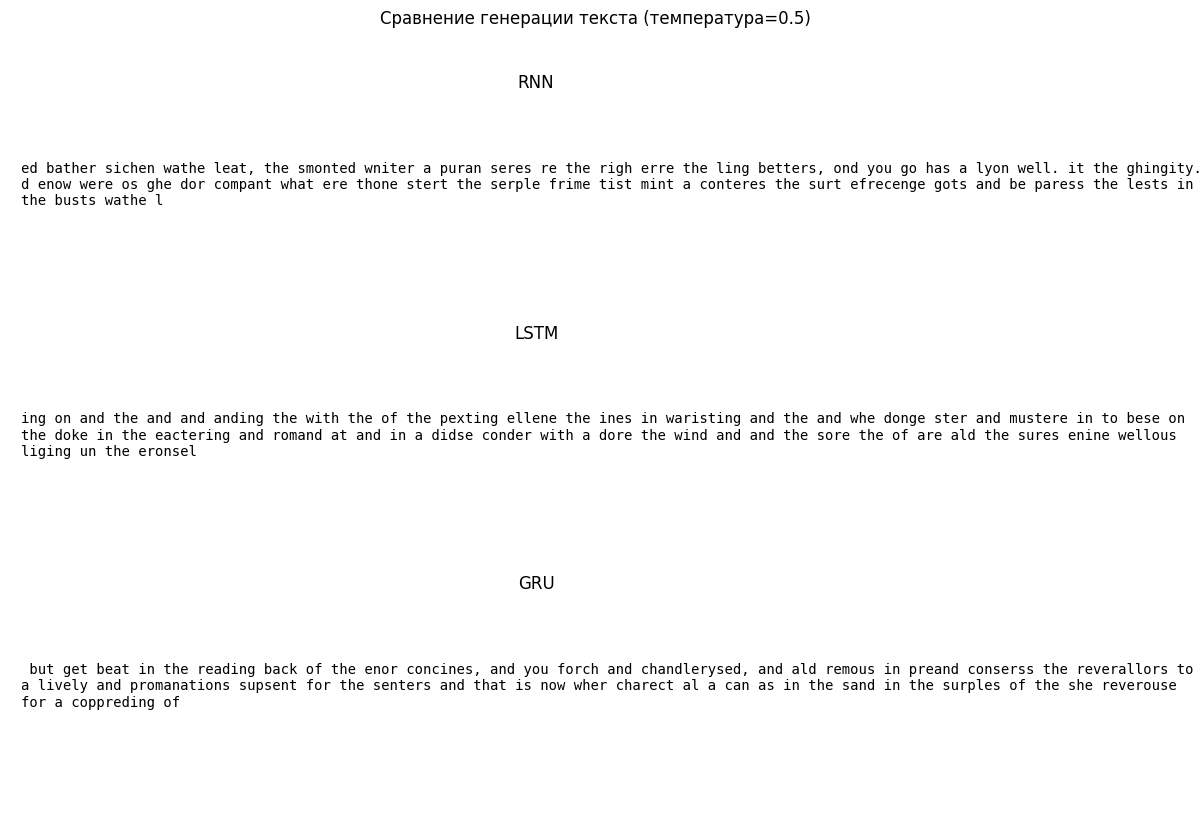


=== Температура генерации: 1.0 ===


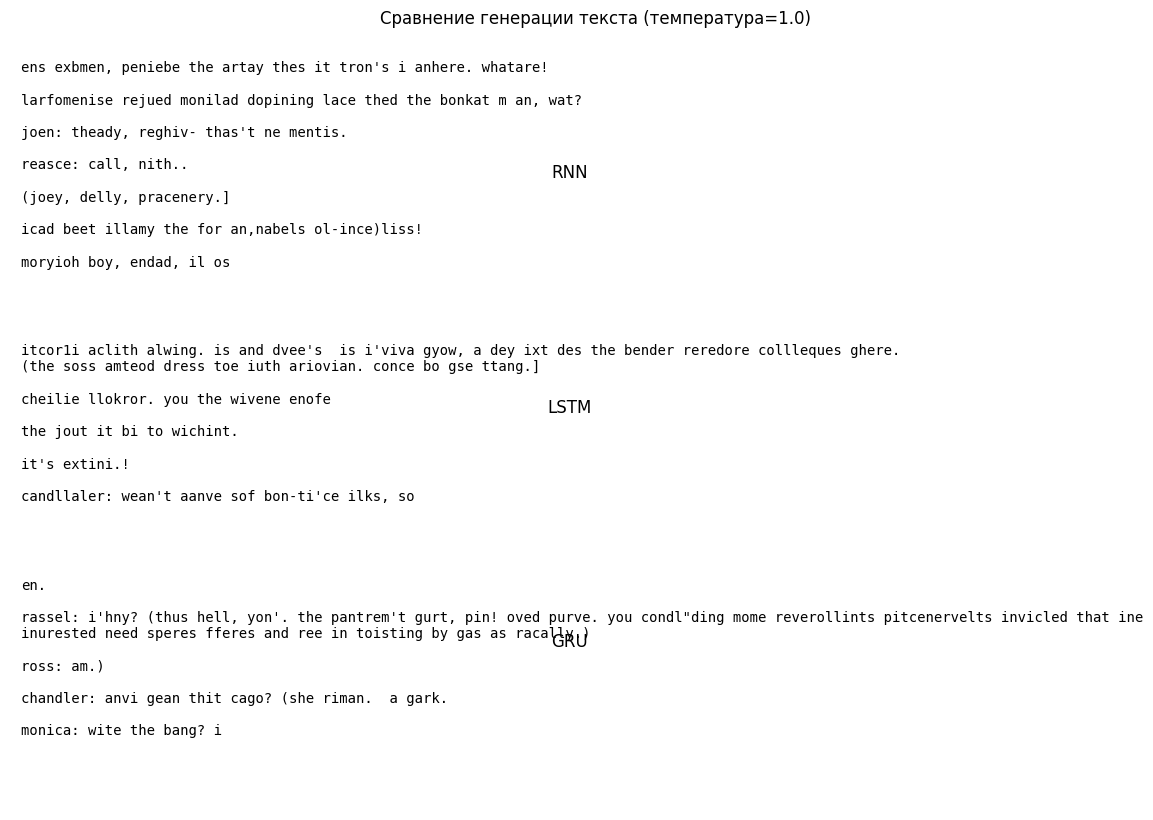


=== Температура генерации: 1.5 ===


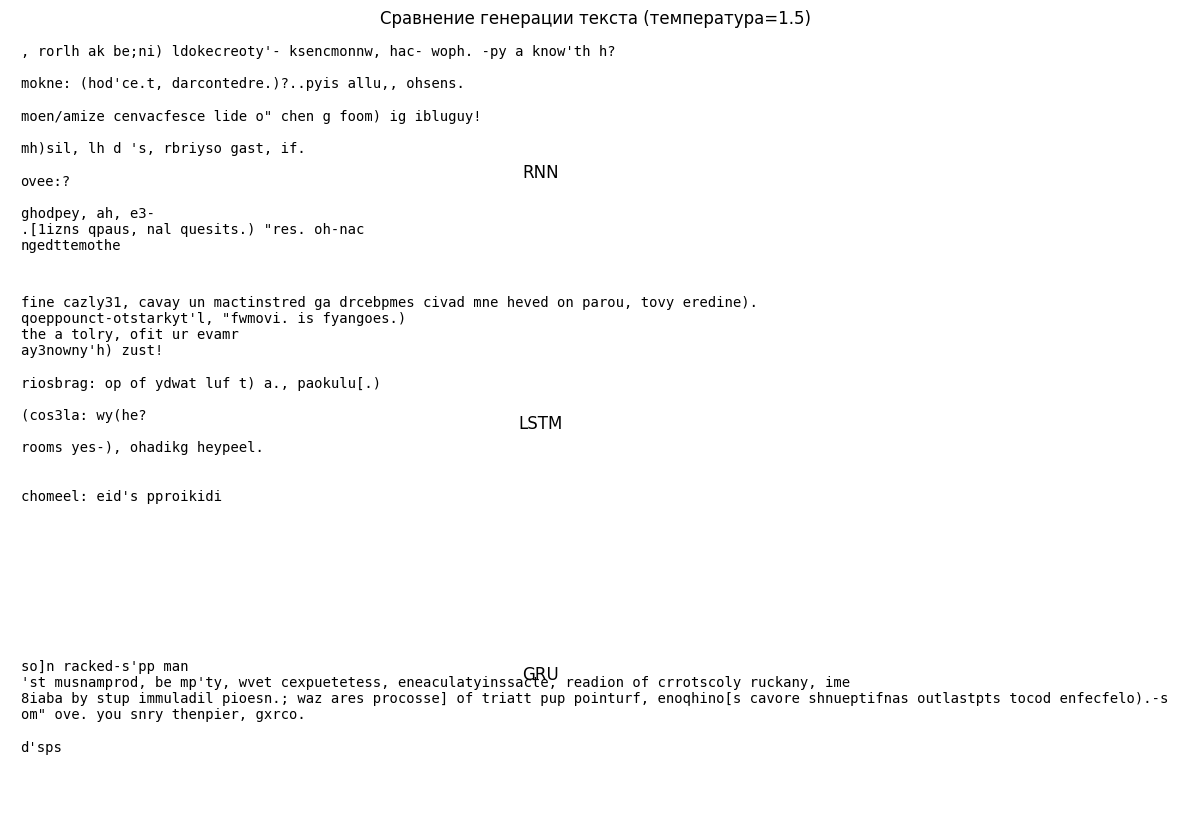

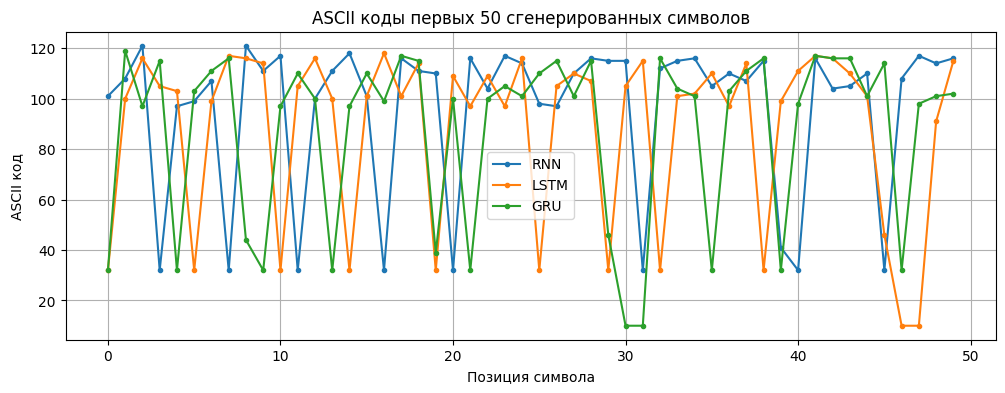

In [35]:
# Визуализация предсказаний на текстах

# Функция для генерации текста с разной "температурой"
def generate_text(model, seed, length=300, temperature=1.0):
    generated = ''
    for _ in range(length):
        # Подготовка входных данных
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed):
            x_pred[0, t, char_indices[char]] = 1.

        # Предсказание следующего символа
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = indices_char[next_index]

        generated += next_char
        seed = seed[1:] + next_char
    return generated

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Визуализация сгенерированных текстов
seed = "elon mask"  # Начальная последовательность
seed = seed[-seq_length:] if len(seed) > seq_length else seed.rjust(seq_length)

# Генерация текста для каждой модели
models_dict = {
    'RNN': model_rnn,
    'LSTM': model_lstm,
    'GRU': model_gru
}

for temp in [0.5, 1.0, 1.5]:  # Разные уровни "творчества"
    print(f"\n=== Температура генерации: {temp} ===")

    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Сравнение генерации текста (температура={temp})', y=1.02)

    for i, (name, model) in enumerate(models_dict.items(), 1):
        generated = generate_text(model, seed, length=300, temperature=temp)

        plt.subplot(3, 1, i)
        plt.text(0.01, 0.5, generated, wrap=True,
                fontfamily='monospace', fontsize=10)
        plt.title(name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3. Сравнение первых 50 предсказанных символов
plt.figure(figsize=(12, 4))
for name, model in models_dict.items():
    generated = generate_text(model, seed, length=50, temperature=1.0)
    plt.plot(range(50), [ord(c) for c in generated], '.-', label=name)

plt.title('ASCII коды первых 50 сгенерированных символов')
plt.xlabel('Позиция символа')
plt.ylabel('ASCII код')
plt.legend()
plt.grid()
plt.show()
